Intra-class covariance matrix W_k for group 'CHIEN':
              LCB           LSM             LBM         LP           LM    \
LCB    82784.000000  43306.666667   8156.000000  3344.666667  2460.600000   
LSM    43306.666667  24671.666667   1490.000000  1778.000000  1272.666667   
 LBM    8156.000000   1490.000000  10484.000000   592.000000   315.400000   
LP      3344.666667   1778.000000    592.000000   222.600000   130.866667   
LM      2460.600000   1272.666667    315.400000   130.866667   108.395556   
LAM     3412.600000   1749.833333    769.733333   190.266667   134.184444   

               LAM  
LCB    3412.600000  
LSM    1749.833333  
 LBM    769.733333  
LP      190.266667  
LM      134.184444  
LAM     237.112222  


Intra-class covariance matrix W_k for group 'LOUP':
              LCB           LSM            LBM         LP          LM    \
LCB    38624.305556  18176.388889  5765.972222  1816.180556  928.680556   
LSM    18176.388889   8847.222222  2793.055556   898.472

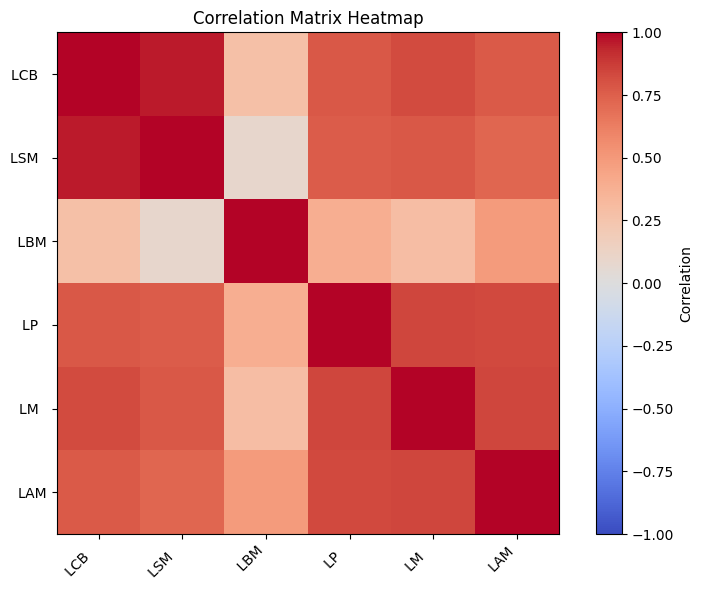

Intra-class covariance matrix W_k for group 'LOUP':


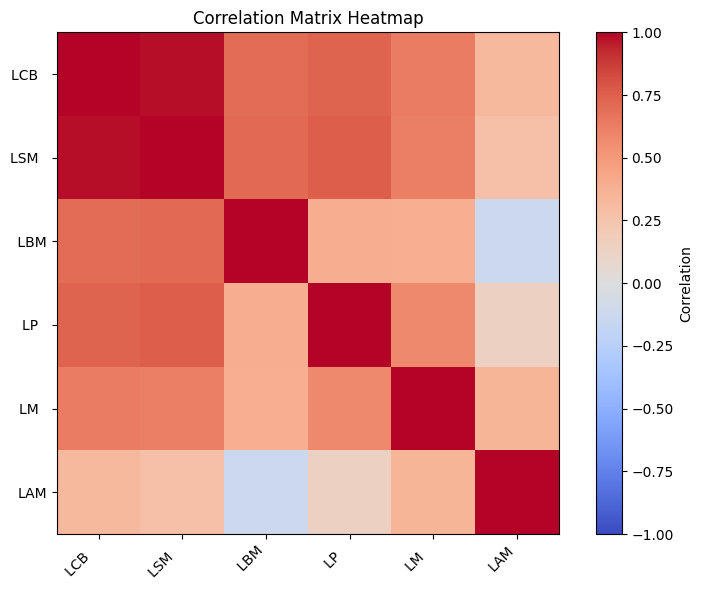

AttributeError: 'Series' object has no attribute 'reshape'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
# Replace 'chienloup.csv' with the exact path to your file
data = pd.read_csv('chienloup.csv', sep=';')

# Extract quantitative and qualitative variables names
quantitative_vars = data.columns[1:-1]  # Quantitative variables
qualitative_var = data.columns[-1]     # Qualitative variable (e.g., category)

# Group the data by the qualitative variable
groups = data.groupby(qualitative_var)

# Initialize a dictionary to store intra-class covariance matrices
W_k_dict = {}

# Compute W_k for each group
for group_name, group in groups:
    group_values = group[quantitative_vars].values
    group_mean = np.mean(group_values, axis=0)
    n_k = group_values.shape[0]  # Number of samples in the group
    # Calculate W_k: intra-class covariance matrix
    W_k = (group_values - group_mean).T @ (group_values - group_mean) / n_k
    W_k_dict[group_name] = W_k  # Store each W_k with the corresponding group name

# Display the results: W_k_dict contains the intra-class matrices for each group
for group_name, W_k in W_k_dict.items():
    print(f"Intra-class covariance matrix W_k for group '{group_name}':")
    print(pd.DataFrame(W_k, index=quantitative_vars, columns=quantitative_vars))
    print("\n")


###(Bonus)############################################################################################################################
# We compute and visualize the correlation matrix from the covariance matrix to interpret the values of the intra covariances
for group_name, W_k in W_k_dict.items():
    print(f"Intra-class covariance matrix W_k for group '{group_name}':")
    # Computation of the correlation matrix from the covariance matrix
    std_dev = np.sqrt(np.diag(W_k))  # Standard deviations
    correlation_matrix = W_k / np.outer(std_dev, std_dev)  # Normalize to get correlations

    # Visualization of the correlation matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(label="Correlation")
    plt.xticks(ticks=range(len(quantitative_vars)), labels=quantitative_vars, rotation=45, ha="right")
    plt.yticks(ticks=range(len(quantitative_vars)), labels=quantitative_vars)
    plt.title("Correlation Matrix Heatmap")
    plt.tight_layout()
    plt.show()

####################################################################################################################################








# Calcul de la variance interclasse (B)
overall_mean = np.mean(data[quantitative_vars], axis=0)
B = np.zeros((len(quantitative_vars), len(quantitative_vars)))

for name, group in groups:
    group_size = len(group)
    group_mean = np.mean(group[quantitative_vars], axis=0)
    diff = (group_mean - overall_mean).reshape(-1, 1)
    B += group_size * (diff @ diff.T)

# Calcul de la variance totale (V)
V = W + B

# Comparaison des trois variances
print("Variance Intraclasse (W):")
print(W)
print("\nVariance Interclasse (B):")
print(B)
print("\nVariance Totale (V):")
print(V)
